In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import metapredict

### Getting ADs, RDs, and their interacting proteins from Soto

In [2]:
#Get Soto ADs
ADs_soto = pd.read_csv("data/soto_ADs.csv")
ADs_soto = ADs_soto[ADs_soto["Domain type"] != "RD"]
ADs_soto

,Effector domain ID,TF name,TF Family,Domain type,Uniprot ID,Coordinates,Sequence,ENSEMBL gene ID,ENSEMBL protein ID,Assay,Reference (PMID),Notes,N or S?,"Activity (H, M or L)","Confidence (H, M or L)"
2,Effector 0003,AHCTF1,AT hook,AD,Q8WYP5,1445-1698,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,ENSG00000153207,ENSP00000497061,Gal4 DB fusion and luciferase assay,11952839,NaN,S,H,H
4,Effector 0005,AHR,bHLH,AD,P35869,545-848,NLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLS...,ENSG00000106546,ENSP00000242057,LexA DB and Gal4 DB fusions and b-galactosidas...,8794892,NaN,N and S,H,H
5,Effector 0006,AIRE,SAND,AD,O43918,292-545,HQKNEDECAVCRDGGELICCDGCPRAFHLACLSPPLREIPSGTWRC...,ENSG00000160224,ENSP00000291582,Luciferase assay,11274163,NaN,S,M,H
6,Effector 0007,AKAP8L,C2H2 ZF,AD,Q9ULX6,1-384,MSYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYG...,ENSG00000011243,ENSP00000380557,CAT assay,11402034,NaN,N and S,M,H
7,Effector 0008,ALX1,Homeodomain,AD,Q15699,237-281,TSCMLPRDTSSCMTPYSHSPRTDSSYTGFSNHQNQFSHVPLNNFF,ENSG00000180318,ENSP00000315417,Gal4 DB fusion and luciferase assay,12390248,based on rat,S,H,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Effector 0870,ZNF326,C2H2 ZF,AD,Q5BKZ1,1-124,MDFEDDYTHSACRNTYQGFNGMDRDYGPGSYGGMDRDYGHGSYGGQ...,ENSG00000162664,ENSP00000340796,Luciferase assay,30401956,NaN,N,M,M
884,Effector 0885,ZNF426,C2H2 ZF,AD,Q9BUY5,99-213,SRTVQGGVLQGWEMRLETQWSILQQDFLRGQTSIGIQLEGKHNGRE...,ENSG00000130818,ENSP00000253115,Gal4 DB fusion and luciferase assay,17409159,NaN,S,H,H
903,Effector 0904,ZNF641,C2H2 ZF,AD,Q96N77,171-262,PDPQDLEERDILRVTYTGDGSEHEGDTPELEAEPPRMLSSVSEDTV...,ENSG00000167528,ENSP00000437832,Gal4 DB fusion and luciferase assay,16343441,NaN,S,M,H
922,Effector 0923,ZXDA,C2H2 ZF,AD,P98168,572-698,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,ENSG00000198205,ENSP00000351530,Gal4 DB fusion and luciferase assay,17493635,NaN,N,H,M


In [3]:
soto_cofactors = pd.read_csv("data/soto_ADs_clustered.csv")
soto_cofactors = soto_cofactors[soto_cofactors["Domain Type"] != "RD"]
soto_cofactors["Cofactor interactions with TF"] = soto_cofactors["Cofactor interactions with TF"].apply(lambda x: x.split(",") if isinstance(x, str) else x)
soto_cofactors = soto_cofactors.explode("Cofactor interactions with TF")
soto_cofactors

,Cluster ID,Effector domain ID,Sequence,TF name,TF Family,Domain Type,Charge,Hydrophobicity,Disorder,Length (aa),Cofactor interactions with TF,Enriched amino acids,gnomAD density of non-syn variants,COSMIC desnity of non-syn mutations,ClinVar desnity of non-syn mutations,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
2,1.0,Effector 0005,NLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLS...,AHR,bHLH,AD,-0.055477,0.401316,0.914474,304,ACTB,"P,N,Q,H,S",11.403509,4.495614,0.0,NaN,NaN,NaN,NaN
2,1.0,Effector 0005,NLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLS...,AHR,bHLH,AD,-0.055477,0.401316,0.914474,304,AIP,"P,N,Q,H,S",11.403509,4.495614,0.0,NaN,NaN,NaN,NaN
2,1.0,Effector 0005,NLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLS...,AHR,bHLH,AD,-0.055477,0.401316,0.914474,304,ANKRA2,"P,N,Q,H,S",11.403509,4.495614,0.0,NaN,NaN,NaN,NaN
2,1.0,Effector 0005,NLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLS...,AHR,bHLH,AD,-0.055477,0.401316,0.914474,304,BRCA1,"P,N,Q,H,S",11.403509,4.495614,0.0,NaN,NaN,NaN,NaN
2,1.0,Effector 0005,NLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLS...,AHR,bHLH,AD,-0.055477,0.401316,0.914474,304,BRD4,"P,N,Q,H,S",11.403509,4.495614,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,NaN,Effector 0847,YQQPDCDTRTEDKEFLHKEDIHEDLESQAEISENYAGDVSQVPELG...,ZNF16,C2H2 ZF,AD,-0.146931,0.362416,0.966443,149,AES,"D,E",10.290828,0.000000,0.0,NaN,NaN,NaN,NaN
920,NaN,Effector 0847,YQQPDCDTRTEDKEFLHKEDIHEDLESQAEISENYAGDVSQVPELG...,ZNF16,C2H2 ZF,AD,-0.146931,0.362416,0.966443,149,EWSR1,"D,E",10.290828,0.000000,0.0,NaN,NaN,NaN,NaN
920,NaN,Effector 0847,YQQPDCDTRTEDKEFLHKEDIHEDLESQAEISENYAGDVSQVPELG...,ZNF16,C2H2 ZF,AD,-0.146931,0.362416,0.966443,149,HDAC5,"D,E",10.290828,0.000000,0.0,NaN,NaN,NaN,NaN
920,NaN,Effector 0847,YQQPDCDTRTEDKEFLHKEDIHEDLESQAEISENYAGDVSQVPELG...,ZNF16,C2H2 ZF,AD,-0.146931,0.362416,0.966443,149,CTR9,"D,E",10.290828,0.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
soto_interacting_cofactors = soto_cofactors.groupby("Cofactor interactions with TF").agg("count").sort_values("Effector domain ID", ascending=False)[[]]
#soto_interacting_cofactors.to_csv("soto_cofactors.csv") #used for Uniprot mapping

In [5]:
#got sequences and mapping from uniprot ID mapped
#extract all domains, disordered regions, etc. from each cofactor
#filter by length
cofactors = pd.read_csv("data/soto_cofactors_mapped.tsv", sep="\t")
cofactors

,From,Entry,Entry Name,Protein names,Gene Names,Sequence,Region,Domain [FT],Compositional bias
0,MED19,A0JLT2,MED19_HUMAN,Mediator of RNA polymerase II transcription su...,MED19 LCMR1,MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,"REGION 1..56; /note=""Disordered""; /evidence=""E...",NaN,"COMPBIAS 11..51; /note=""Pro residues""; /eviden..."
1,CNOT1,A5YKK6,CNOT1_HUMAN,CCR4-NOT transcription complex subunit 1 (CCR4...,CNOT1 CDC39 KIAA1007 NOT1 AD-005,MNLDSLSLALSQISYLVDNLTKKNYRASQQEIQHIVNRHGPEADRH...,"REGION 720..768; /note=""Disordered""; /evidence...",NaN,"COMPBIAS 723..768; /note=""Polar residues""; /ev..."
2,BDP1,A6H8Y1,BDP1_HUMAN,Transcription factor TFIIIB component B'' homo...,BDP1 KIAA1241 KIAA1689 TFNR,MFRRARLSVKPNVRPGVGARGSTASNPQRGRESPRPPDPATDSASK...,"REGION 1..299; /note=""Interaction with ZBTB43""...","DOMAIN 295..345; /note=""Myb-like""","COMPBIAS 67..81; /note=""Basic and acidic resid..."
3,FAM83G,A6ND36,FA83G_HUMAN,Protein FAM83G (Protein associated with SMAD1),FAM83G PAWS1,MAFSQVQCLDDNHVNWRSSESKPEFFYSEEQRLALEALVARGRDAF...,"REGION 75..108; /note=""Disordered""; /evidence=...",NaN,"COMPBIAS 450..467; /note=""Polar residues""; /ev..."
4,WTIP,A6NIX2,WTIP_HUMAN,Wilms tumor protein 1-interacting protein (WT1...,WTIP,MQRSRAGADEAALLLAGLALRELEPGCGSPGRGRRGPRPGPGDEAA...,"REGION 22..149; /note=""Disordered""; /evidence=...","DOMAIN 223..284; /note=""LIM zinc-binding 1""; /...","COMPBIAS 165..190; /note=""Pro residues""; /evid..."
...,...,...,...,...,...,...,...,...,...
992,STK3,Q9Y6E0,STK24_HUMAN,Serine/threonine-protein kinase 24 (EC 2.7.11....,STK24 MST3 STK3,MDSRAQLWGLALNKRRATLPHPGGSTNLKADPEELFTKLEKIGKGS...,"REGION 309..337; /note=""Disordered""; /evidence...","DOMAIN 36..286; /note=""Protein kinase""; /evide...",NaN
993,CHCHD2,Q9Y6H1,CHCH2_HUMAN,Coiled-coil-helix-coiled-coil-helix domain-con...,CHCHD2 C7orf17 AAG10,MPRGSRSRTSRMAPPASRAPQMRAAPRPAPVAQPPAAAPPSAVGSS...,"REGION 1..50; /note=""Disordered""; /evidence=""E...","DOMAIN 111..151; /note=""CHCH""; /evidence=""ECO:...",NaN
994,TAF6L,Q9Y6J9,TAF6L_HUMAN,TAF6-like RNA polymerase II p300/CBP-associate...,TAF6L PAF65A,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...,"REGION 403..430; /note=""Disordered""; /evidence...",NaN,NaN
995,IKBKG,Q9Y6K9,NEMO_HUMAN,NF-kappa-B essential modulator (NEMO) (FIP-3) ...,IKBKG FIP3 NEMO,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,"REGION 1..197; /note=""Required for interaction...",NaN,NaN


In [6]:
cofactors["Region"] = cofactors["Region"].apply(lambda x: x.split("REGION ") if isinstance(x,str) else x)
cofactors["Domain"] = cofactors["Domain [FT]"].apply(lambda x: x.split("DOMAIN ") if isinstance(x,str) else x)
cofactors["Compositional bias"] = cofactors["Compositional bias"].apply(lambda x: x.split("COMPBIAS ") if isinstance(x,str) else x)

In [8]:
import re

def parse_region_category(region):
    """Extract the region category from the /note field."""
    match = re.search(r'/note="([^"]+)"', region)
    return match.group(1) if match else None

def extract_region_sequence(sequence, region):
    """Extract the amino acid sequence for the given region coordinates."""
    match = re.search(r'(\d+)\.\.(\d+)', region)
    if match:
        start, end = map(int, match.groups())  # Convert to integers
        if 1 <= start <= len(sequence) and 1 <= end <= len(sequence):
            return sequence[start-1:end], str(start)+":"+str(end)  # Convert to 0-based indexing
    return None, None

In [11]:
selectcols = ["From", "Entry Name", "Sequence", "Type", "Note", "Region sequence"]
cofactors_regions = pd.DataFrame(columns=selectcols)

for var in ["Region", "Domain", "Compositional bias"]:
    cofactors_var = cofactors.explode(var)
    cofactors_var = cofactors_var[[pd.notna(x) and x != "" for x in cofactors_var[var]]]
    cofactors_var["Type"] = var
    cofactors_var["Note"] = cofactors_var[var].apply(parse_region_category)
    cofactors_var[["Region sequence", "Region coordinates"]] = cofactors_var.apply(
        lambda row: pd.Series(extract_region_sequence(row["Sequence"], row[var])), axis=1
    )
    cofactors_regions = pd.concat([cofactors_regions, cofactors_var[selectcols]])

cofactors_regions = cofactors_regions.dropna()
cofactors_regions["Region sequence length"] = cofactors_regions["Region sequence"].apply(len)
cofactors_regions = cofactors_regions.reset_index().drop("index", axis=1)
cofactors_regions.head()

,From,Entry Name,Sequence,Type,Note,Region sequence,Region sequence length
0,MED19,MED19_HUMAN,MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,Region,Disordered,MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,56
1,MED19,MED19_HUMAN,MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,Region,Disordered,PKKKNKHKHKQSRTQDPVPPETPSDSDHKKKKKKKEEDPDRKRKKK...,74
2,CNOT1,CNOT1_HUMAN,MNLDSLSLALSQISYLVDNLTKKNYRASQQEIQHIVNRHGPEADRH...,Region,Disordered,LSIGGSAAPHTQSMQGFPPNLGSAFSTPQSPAKAFPPLSTPNQTTAFSG,49
3,CNOT1,CNOT1_HUMAN,MNLDSLSLALSQISYLVDNLTKKNYRASQQEIQHIVNRHGPEADRH...,Region,Interaction with ZFP36,NNDPFVQRKLGTSGLNQPTFQQSKMKPSDLSQVWPEANQHFSKEID...,216
4,CNOT1,CNOT1_HUMAN,MNLDSLSLALSQISYLVDNLTKKNYRASQQEIQHIVNRHGPEADRH...,Region,"Interaction with CNOT6, CNOT6L, CNOT7 and CNOT8",EPPENIQEKIAFIFNNLSQSNMTQKVEELKETVKEEFMPWVSQYLV...,516


In [12]:
cofactors_regions["Region ID"] = cofactors_regions["From"] + "_" + cofactors_regions["Note"]
# Dictionary to track occurrences
count_dict = {}
# Function to add a unique integer suffix
def add_suffix(name):
    if name in count_dict:
        count_dict[name] += 1
    else:
        count_dict[name] = 1
    return f"{name}_{count_dict[name]}"
# Apply function to ensure unique name
cofactors_regions["Region ID"] = cofactors_regions["Region ID"].apply(add_suffix)
cofactors_regions.head()
cofactors_regions.to_csv("helperdata/soto_cofactors_regions.csv", index_label=False)

In [109]:
cofactors_regions[["BRD4" in x for x in cofactors_regions["Entry Name"]]]["Entry Name"].unique()

array(['BRD4_HUMAN'], dtype=object)

---
### Looking at MED CDK complex cofactors

In [5]:
def getseq(fasta):
    with open(fasta) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = record.seq
    return sequence


In [6]:
CCNC = getseq("data/CCNC_aa.fasta")
CDK8 = getseq("data/CDK8_aa.fasta")
CDK19 = getseq("data/CDK19_aa.fasta")
MED13 = getseq("data/MED13_aa.fasta")
POL2RA = getseq("data/POLR2A_aa.fasta")

In [15]:
POL2RA_CTD = str(POL2RA)[1592:1960]

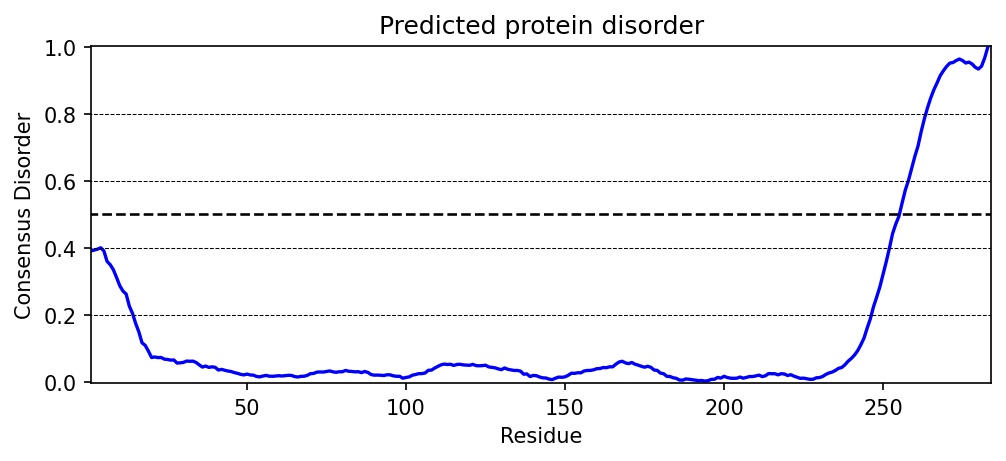

In [18]:
metapredict.graph_disorder(str(CCNC))

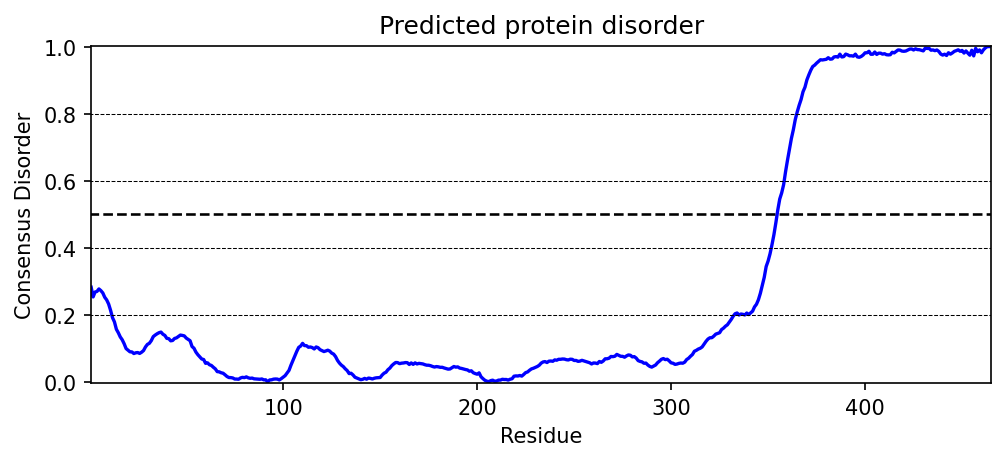

In [19]:
metapredict.graph_disorder(str(CDK8))

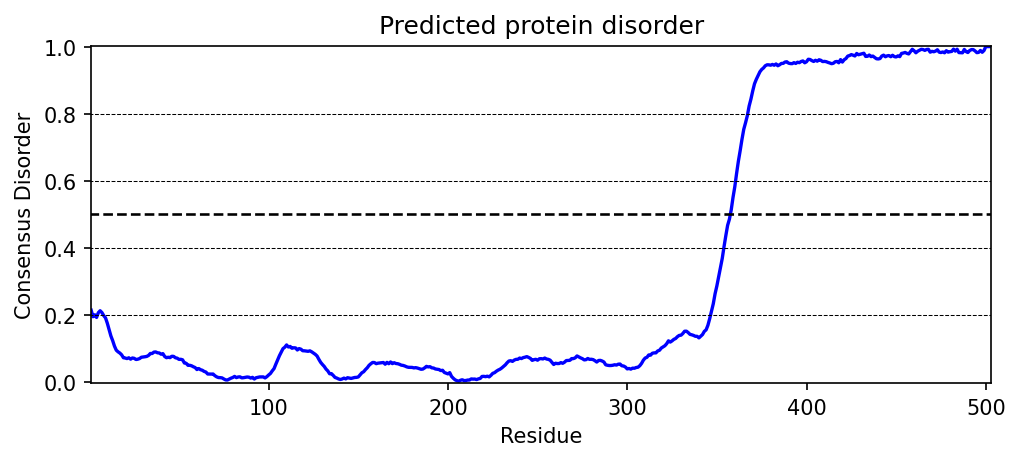

In [20]:
metapredict.graph_disorder(str(CDK19))

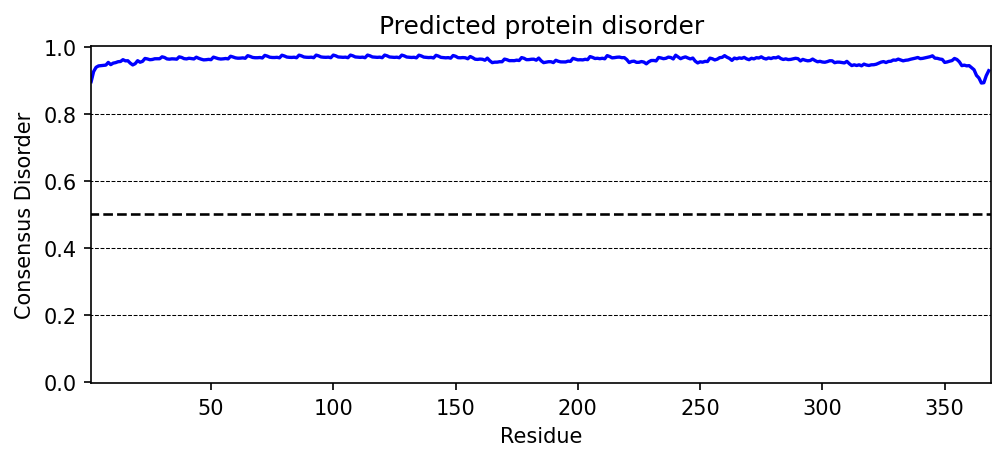

In [21]:
metapredict.graph_disorder(str(POL2RA_CTD))